Firstly, we must import the libraries necessary for the project.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Exoplanet measurement data is contained in a csv file; we upload this file and name it data.

In [5]:
file_path = "/content/drive/MyDrive/exo_table_insol_radii.csv"
data = pd.read_csv(file_path)

Since the dataset contains multiple observations for the same planetary systems, we will use the most recent for our calculations; however, the dataset is messy and contains invalid, null, and empty entries in many of the data cells. These rows are dropped.

In [6]:
data = data.dropna(subset=['rowupdate'])
data = data.sort_values(by='rowupdate', ascending=False).drop_duplicates(subset='pl_name')

Just as well, there are missing and invalid values for stellar flux and planetary radius. The rows containing missing values must also be dropped.



In [7]:
data = data.dropna(subset=['pl_insol', 'pl_rade'])

Now we create a function which will calculate the ESI for the remaining planets

In [8]:

def calculate_esi_flux_radius(row):
    #reference values
    earth_flux = 1.0
    earth_radius = 1.0


    stellar_flux = row['pl_insol']
    radius = row['pl_rade']


    flux_component = (stellar_flux - earth_flux) / (stellar_flux + earth_flux)
    radius_component = (radius - earth_radius) / (radius + earth_radius)


    esi = 1 - np.sqrt(0.5 * (flux_component ** 2 + radius_component ** 2))
    return esi

This function is applied to our dataset.

In [9]:
data['ESI'] = data.apply(calculate_esi_flux_radius, axis=1)

The planets are sorted in descending order

In [10]:
sorted_data = data.sort_values(by='ESI', ascending=False)

Now the top 10 exoplanets with the highest ESI values are extracted

In [11]:
top_10_earth_like = sorted_data[['pl_name', 'ESI']].head(10)

The planets are then saved to a csv file, but also printed out.

In [12]:
output_path = "top_10_earth_like_planets.csv"
top_10_earth_like.to_csv(output_path, index=False)


print("Top 10 Earth-like Planets:")
print(top_10_earth_like)

Top 10 Earth-like Planets:
             pl_name       ESI
34740      TOI-700 e  0.903320
14761  Kepler-1649 c  0.896907
34737      TOI-700 d  0.890151
32966     LP 890-9 c  0.885413
5545         K2-72 e  0.880886
5542         K2-72 c  0.868456
4972          K2-3 d  0.816646
34748      TOI-715 b  0.801162
872      Gliese 12 b  0.780307
34261     TOI-2285 b  0.770990


A scatterplot also puts into perspective where ESI typically ranges for planets. It is clear that a considerable majority of planets do not have ESI values above 0.4 revealing that planets similar to Earth are quite rare.

Text(0.5, 0, '')

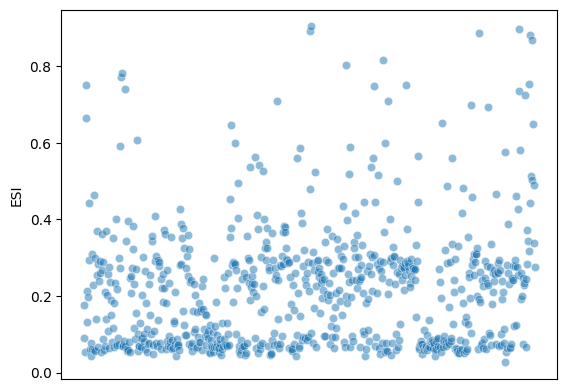

In [13]:
sns.scatterplot(data=data, x='pl_name', y='ESI', alpha=.5)
plt.tick_params(bottom=False, labelbottom=False)
plt.xlabel("")

Now lets find exactly what percent of planets exist below 0.4 ESI by creating a function which takes a given esi value and the dataset as imputs

In [17]:
def belowESI(esi,series):
  totalbelow=0
  for index, row in series.iterrows():
    if row['ESI'] < esi:
      totalbelow += 1
  return totalbelow / len(series) * 100

belowESI(.4, data)

90.0

90% of exoplanets have ESI values below 0.4!